<a href="https://www.nlpfromscratch.com?utm_source=notebook&utm_medium=nb-header"><center><img src="assets/NLPFS_banner.png"></center></a>

### Analyzing Digital Analytics Data with Generative AI

Copyright, NLP from scratch, 2023.

[nlpfromscratch.com](https://www.nlpfromscratch.com)

**MeasureCamp Toronto 2024**  

<a href="https://toronto.measurecamp.org/"><center><img src="assets/measurecamp_logo.png"></center></a>

Saturday, October 5th, 2024

------------

### Introduction

In this short workshop, we will explore using Generative AI locally in Jupyter using the [Jupyter AI](https://jupyter-ai.readthedocs.io/en/latest/index.html) package as well as the [Ollama](ollama.ai) framework for model serving. We will apply this to a simple example of an export of data from Google Analytics, and see how generative AI models can assist in being our "AI pair programmer" or teammate to help with the analysis if we are less technical. 

### Jupyter & Jupyter AI
[Jupyter](https://jupyter.org/) is an open-source web-based interactive computing environment that enables users to create and share documents that contain live code, equations, visualizations, and narrative text. It is the de facto standard tool for doing data science and AI development work.

<img src="assets/jupyter_image.png"/>

Jupyter has been extended with the [Jupyter AI](https://jupyter-ai.readthedocs.io/en/latest/index.html) library which adds:
- A conversational assistant (Jupyternaut)
- Generative AI capabilities within Jupyter notebooks in all applications
- Support for a wide range of generative model providers and models (AI21, Anthropic, Cohere, Gemini, Hugging Face, MistralAI, OpenAI, SageMaker, NVIDIA, etc. and many more local models via Ollama).

<img src="assets/jupyterai_image.png"/>

### Getting Started with Jupyter AI

If you haven't done so already, you should [install Jupyter AI](https://jupyter-ai.readthedocs.io/en/latest/users/index.html#installation), the preferred method is using `pip`:

In [ ]:
# install 
!pip install jupyter-ai

First, we reload the `jupyter_ai` extension, as per the documentation:

In [1]:
%reload_ext jupyter_ai

You can list all model providers by using `%ai list`:

In [2]:
%ai list

| Provider | Environment variable | Set? | Models |
|----------|----------------------|------|--------|
| `ai21` | `AI21_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`ai21:j1-large`</li><li>`ai21:j1-grande`</li><li>`ai21:j1-jumbo`</li><li>`ai21:j1-grande-instruct`</li><li>`ai21:j2-large`</li><li>`ai21:j2-grande`</li><li>`ai21:j2-jumbo`</li><li>`ai21:j2-grande-instruct`</li><li>`ai21:j2-jumbo-instruct`</li></ul> |
| `bedrock` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | <ul><li>`bedrock:amazon.titan-text-express-v1`</li><li>`bedrock:amazon.titan-text-lite-v1`</li><li>`bedrock:amazon.titan-text-premier-v1:0`</li><li>`bedrock:ai21.j2-ultra-v1`</li><li>`bedrock:ai21.j2-mid-v1`</li><li>`bedrock:ai21.jamba-instruct-v1:0`</li><li>`bedrock:cohere.command-light-text-v14`</li><li>`bedrock:cohere.command-text-v14`</li><li>`bedrock:cohere.command-r-v1:0`</li><li>`bedrock:cohere.command-r-plus-v1:0`</li><li>`bedrock:meta.llama2-13b-chat-v1`</li><li>`bedrock:meta.llama2-70b-chat-v1`</li><li>`bedrock:meta.llama3-8b-instruct-v1:0`</li><li>`bedrock:meta.llama3-70b-instruct-v1:0`</li><li>`bedrock:meta.llama3-1-8b-instruct-v1:0`</li><li>`bedrock:meta.llama3-1-70b-instruct-v1:0`</li><li>`bedrock:meta.llama3-1-405b-instruct-v1:0`</li><li>`bedrock:mistral.mistral-7b-instruct-v0:2`</li><li>`bedrock:mistral.mixtral-8x7b-instruct-v0:1`</li><li>`bedrock:mistral.mistral-large-2402-v1:0`</li><li>`bedrock:mistral.mistral-large-2407-v1:0`</li></ul> |
| `bedrock-chat` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | <ul><li>`bedrock-chat:amazon.titan-text-express-v1`</li><li>`bedrock-chat:amazon.titan-text-lite-v1`</li><li>`bedrock-chat:amazon.titan-text-premier-v1:0`</li><li>`bedrock-chat:anthropic.claude-v2`</li><li>`bedrock-chat:anthropic.claude-v2:1`</li><li>`bedrock-chat:anthropic.claude-instant-v1`</li><li>`bedrock-chat:anthropic.claude-3-sonnet-20240229-v1:0`</li><li>`bedrock-chat:anthropic.claude-3-haiku-20240307-v1:0`</li><li>`bedrock-chat:anthropic.claude-3-opus-20240229-v1:0`</li><li>`bedrock-chat:anthropic.claude-3-5-sonnet-20240620-v1:0`</li><li>`bedrock-chat:meta.llama2-13b-chat-v1`</li><li>`bedrock-chat:meta.llama2-70b-chat-v1`</li><li>`bedrock-chat:meta.llama3-8b-instruct-v1:0`</li><li>`bedrock-chat:meta.llama3-70b-instruct-v1:0`</li><li>`bedrock-chat:meta.llama3-1-8b-instruct-v1:0`</li><li>`bedrock-chat:meta.llama3-1-70b-instruct-v1:0`</li><li>`bedrock-chat:meta.llama3-1-405b-instruct-v1:0`</li><li>`bedrock-chat:mistral.mistral-7b-instruct-v0:2`</li><li>`bedrock-chat:mistral.mixtral-8x7b-instruct-v0:1`</li><li>`bedrock-chat:mistral.mistral-large-2402-v1:0`</li><li>`bedrock-chat:mistral.mistral-large-2407-v1:0`</li></ul> |
| `bedrock-custom` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | Specify the ARN (Amazon Resource Name) of the custom/provisioned model as the model ID. For more information, see the [Amazon Bedrock model IDs documentation](https://docs.aws.amazon.com/bedrock/latest/userguide/model-ids.html).

The model provider must also be specified below. This is the provider of your foundation model *in lowercase*, e.g. `amazon`, `anthropic`, `meta`, or `mistral`. |
| `anthropic` | `ANTHROPIC_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`anthropic:claude-v1`</li><li>`anthropic:claude-v1.0`</li><li>`anthropic:claude-v1.2`</li><li>`anthropic:claude-2`</li><li>`anthropic:claude-2.0`</li><li>`anthropic:claude-instant-v1`</li><li>`anthropic:claude-instant-v1.0`</li><li>`anthropic:claude-instant-v1.2`</li></ul> |
| `anthropic-chat` | `ANTHROPIC_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`anthropic-chat:claude-2.0`</li><li>`anthropic-chat:claude-2.1`</li><li>`anthropic-chat:claude-instant-1.2`</li><li>`anthropic-chat:claude-3-opus-20240229`</li><li>`anthropic-chat:claude-3-sonnet-20240229`</li><li>`anthropic-chat:claude-3-haiku-20240307`</li><li>`anthropic-chat:claude-3-5-sonnet-20240620`</li></ul> |
| `azure-chat-openai` | `AZURE_OPENAI_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | This provider does not define a list of models. |
| `cohere` | `COHERE_API_KEY` | <abbr title="You have set this environment variable, so you can use this provider's models.">✅</abbr> | <ul><li>`cohere:command`</li><li>`cohere:command-nightly`</li><li>`cohere:command-light`</li><li>`cohere:command-light-nightly`</li><li>`cohere:command-r-plus`</li><li>`cohere:command-r`</li></ul> |
| `gemini` | `GOOGLE_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`gemini:gemini-1.5-pro`</li><li>`gemini:gemini-1.5-flash`</li><li>`gemini:gemini-1.0-pro`</li><li>`gemini:gemini-1.0-pro-001`</li><li>`gemini:gemini-1.0-pro-latest`</li><li>`gemini:gemini-1.0-pro-vision-latest`</li><li>`gemini:gemini-pro`</li><li>`gemini:gemini-pro-vision`</li></ul> |
| `gpt4all` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | <ul><li>`gpt4all:ggml-gpt4all-j-v1.2-jazzy`</li><li>`gpt4all:ggml-gpt4all-j-v1.3-groovy`</li><li>`gpt4all:ggml-gpt4all-l13b-snoozy`</li><li>`gpt4all:mistral-7b-openorca.Q4_0`</li><li>`gpt4all:mistral-7b-instruct-v0.1.Q4_0`</li><li>`gpt4all:gpt4all-falcon-q4_0`</li><li>`gpt4all:wizardlm-13b-v1.2.Q4_0`</li><li>`gpt4all:nous-hermes-llama2-13b.Q4_0`</li><li>`gpt4all:gpt4all-13b-snoozy-q4_0`</li><li>`gpt4all:mpt-7b-chat-merges-q4_0`</li><li>`gpt4all:orca-mini-3b-gguf2-q4_0`</li><li>`gpt4all:starcoder-q4_0`</li><li>`gpt4all:rift-coder-v0-7b-q4_0`</li><li>`gpt4all:em_german_mistral_v01.Q4_0`</li></ul> |
| `huggingface_hub` | `HUGGINGFACEHUB_API_TOKEN` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | See [https://huggingface.co/models](https://huggingface.co/models) for a list of models. Pass a model's repository ID as the model ID; for example, `huggingface_hub:ExampleOwner/example-model`. |
| `mistralai` | `MISTRAL_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`mistralai:open-mistral-7b`</li><li>`mistralai:open-mixtral-8x7b`</li><li>`mistralai:open-mixtral-8x22b`</li><li>`mistralai:mistral-small-latest`</li><li>`mistralai:mistral-medium-latest`</li><li>`mistralai:mistral-large-latest`</li><li>`mistralai:codestral-latest`</li></ul> |
| `nvidia-chat` | `NVIDIA_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`nvidia-chat:playground_llama2_70b`</li><li>`nvidia-chat:playground_nemotron_steerlm_8b`</li><li>`nvidia-chat:playground_mistral_7b`</li><li>`nvidia-chat:playground_nv_llama2_rlhf_70b`</li><li>`nvidia-chat:playground_llama2_13b`</li><li>`nvidia-chat:playground_steerlm_llama_70b`</li><li>`nvidia-chat:playground_llama2_code_13b`</li><li>`nvidia-chat:playground_yi_34b`</li><li>`nvidia-chat:playground_mixtral_8x7b`</li><li>`nvidia-chat:playground_neva_22b`</li><li>`nvidia-chat:playground_llama2_code_34b`</li></ul> |
| `ollama` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | See [https://www.ollama.com/library](https://www.ollama.com/library) for a list of models. Pass a model's name; for example, `deepseek-coder-v2`. |
| `openai` | `OPENAI_API_KEY` | <abbr title="You have set this environment variable, so you can use this provider's models.">✅</abbr> | <ul><li>`openai:babbage-002`</li><li>`openai:davinci-002`</li><li>`openai:gpt-3.5-turbo-instruct`</li></ul> |
| `openai-chat` | `OPENAI_API_KEY` | <abbr title="You have set this environment variable, so you can use this provider's models.">✅</abbr> | <ul><li>`openai-chat:gpt-3.5-turbo`</li><li>`openai-chat:gpt-3.5-turbo-0125`</li><li>`openai-chat:gpt-3.5-turbo-0301`</li><li>`openai-chat:gpt-3.5-turbo-0613`</li><li>`openai-chat:gpt-3.5-turbo-1106`</li><li>`openai-chat:gpt-3.5-turbo-16k`</li><li>`openai-chat:gpt-3.5-turbo-16k-0613`</li><li>`openai-chat:gpt-4`</li><li>`openai-chat:gpt-4-turbo`</li><li>`openai-chat:gpt-4-turbo-preview`</li><li>`openai-chat:gpt-4-0613`</li><li>`openai-chat:gpt-4-32k`</li><li>`openai-chat:gpt-4-32k-0613`</li><li>`openai-chat:gpt-4-0125-preview`</li><li>`openai-chat:gpt-4-1106-preview`</li><li>`openai-chat:gpt-4o`</li><li>`openai-chat:gpt-4o-mini`</li></ul> |
| `openrouter` | `OPENROUTER_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | This provider does not define a list of models. |
| `qianfan` | `QIANFAN_AK`, `QIANFAN_SK` | <abbr title="You have not set all of these environment variables, so you cannot use this provider's models.">❌</abbr> | <ul><li>`qianfan:ERNIE-Bot`</li><li>`qianfan:ERNIE-Bot-4`</li></ul> |
| `sagemaker-endpoint` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | Specify an endpoint name as the model ID. In addition, you must specify a region name, request schema, and response path. For more information, see the documentation about [SageMaker endpoints deployment](https://docs.aws.amazon.com/sagemaker/latest/dg/realtime-endpoints-deploy-models.html) and about [using magic commands with SageMaker endpoints](https://jupyter-ai.readthedocs.io/en/latest/users/index.html#using-magic-commands-with-sagemaker-endpoints). |
| `togetherai` | `TOGETHER_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`togetherai:Austism/chronos-hermes-13b`</li><li>`togetherai:DiscoResearch/DiscoLM-mixtral-8x7b-v2`</li><li>`togetherai:EleutherAI/llemma_7b`</li><li>`togetherai:Gryphe/MythoMax-L2-13b`</li><li>`togetherai:Meta-Llama/Llama-Guard-7b`</li><li>`togetherai:Nexusflow/NexusRaven-V2-13B`</li><li>`togetherai:NousResearch/Nous-Capybara-7B-V1p9`</li><li>`togetherai:NousResearch/Nous-Hermes-2-Yi-34B`</li><li>`togetherai:NousResearch/Nous-Hermes-Llama2-13b`</li><li>`togetherai:NousResearch/Nous-Hermes-Llama2-70b`</li></ul> |

Aliases and custom commands:

| Name | Target |
|------|--------|
| `gpt2` | `huggingface_hub:gpt2` |
| `gpt3` | `openai:davinci-002` |
| `chatgpt` | `openai-chat:gpt-3.5-turbo` |
| `gpt4` | `openai-chat:gpt-4` |
| `ernie-bot` | `qianfan:ERNIE-Bot` |
| `ernie-bot-4` | `qianfan:ERNIE-Bot-4` |
| `titan` | `bedrock:amazon.titan-tg1-large` |
| `openrouter-claude` | `openrouter:anthropic/claude-3.5-sonnet:beta` |


and list models for a specific provider using `%ai list <provider>`:

In [3]:
%ai list openai

| Provider | Environment variable | Set? | Models |
|----------|----------------------|------|--------|
| `openai` | `OPENAI_API_KEY` | <abbr title="You have set this environment variable, so you can use this provider's models.">✅</abbr> | <ul><li>`openai:babbage-002`</li><li>`openai:davinci-002`</li><li>`openai:gpt-3.5-turbo-instruct`</li></ul> |


The `%%ai` magic can be used to run commands in-line. Here we can send an ordinary prompt to `gpt-3.5-turbo`. Note that this requires setting the `OPENAI_API_KEY` environment variable before running Jupyter (not sufficient to just configure in settings):

In [5]:
%%ai openai:gpt-3.5-turbo-instruct
Who are you?



I am an AI language model created by OpenAI called GPT-3. I was trained on a large dataset of text from the internet to generate human-like text based on the input given to me. I am capable of answering questions, completing prompts, and engaging in conversations. My purpose is to assist humans in various tasks and provide helpful and informative responses.

The default behavior is to output markdown. We can tell the model to write code directly by using `-f code`:

In [6]:
%%ai openai:gpt-3.5-turbo-instruct -f code
Write python code to plot a histogram of 10,000 numbers in the normal distribution.

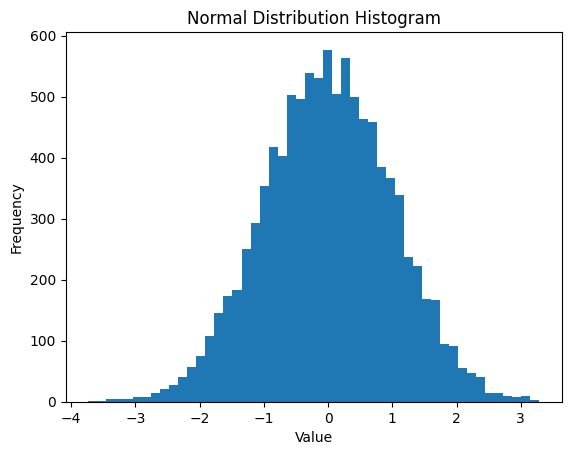

In [7]:


import numpy as np
import matplotlib.pyplot as plt

# Generate 10,000 random numbers from the normal distribution
data = np.random.normal(size=10000)

# Plot the histogram with 50 bins
plt.hist(data, bins=50)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Normal Distribution Histogram')

# Show the plot
plt.show()

### Ollama

[Ollama](http://www.ollama.ai) is a framework based on [llama.cpp](https://github.com/ggerganov/llama.cpp) for running and serving LLMs locally. Amazingly, Jupyter AI supports Ollama as a model provider, so we can use generative AI locally without worrying about privacy concerns or being charged for usage by a model provider!

Here, we use Ollama to code using [LLaMA 3.2](https://ollama.com/library/llama3.2):

In [13]:
%%ai ollama:llama3.2 -f code
Write python code to plot a histogram of 10,000 numbers in the normal distribution. Make the plot burgandy.

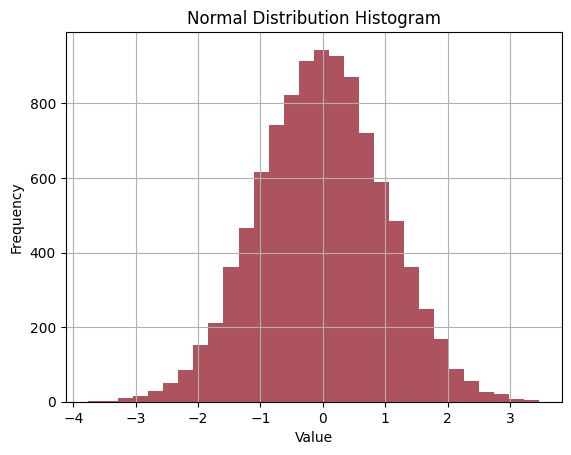

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 10,000 random numbers from a normal distribution
numbers = np.random.normal(0, 1, 10000)

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the histogram with burgundy color
ax.hist(numbers, bins=30, alpha=0.7, color='#8B0A1A')

# Set title and labels
ax.set_title('Normal Distribution Histogram')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')

# Show grid lines
ax.grid(True)

# Display the plot
plt.show()

### Using Jupyter AI and LLaMA 3.2 to analyze Google Analytics data

We will now use Jupyter AI and the LLaMA 3.2 model to help us visualize some analytics data we exported from Google Analytics. 

First we will have the model help us read in the data:

In [18]:
%%ai ollama:llama3.2 -f code
Write the next section of this notebook - read in a CSV file called 'sample_ga_data.csv' from the 'data' directory.

In [19]:
import pandas as pd
import os

# Define path to data file
data_dir = 'data'
file_name = 'sample_ga_data.csv'

# Construct full path to data file
full_path = os.path.join(data_dir, file_name)

# Read CSV file into a pandas DataFrame
df = pd.read_csv(full_path)

Now we can show what was read in above:

In [24]:
%%ai ollama:llama3.2 -f code
Show the data in the dataframe `df`.

In [26]:
print(df)

        Date  Sessions  Bounce rate  Active users  Average session duration  \
0   20240904        40     0.525000            30                370.297214   
1   20240913        30     0.433333            20                263.390435   
2   20240924        29     0.517241            26                 69.263001   
3   20240927        25     0.360000            23                269.768585   
4   20240910        24     0.416667            19                113.468108   
5   20241001        24     0.458333            16                100.926206   
6   20240917        22     0.545455            20                 81.033939   
7   20240918        18     0.611111             9                 38.904332   
8   20240919        18     0.611111            14                 59.650867   
9   20240923        18     0.611111            15                 28.592473   
10  20241002        18     0.500000            12                149.538097   
11  20240905        16     0.625000            10   

In [27]:
%%ai ollama:llama3.2
Write code to take the dataframe 'df' and reformat the column 'Date' which is in format YYYYMMDD into a `datetime` type in pandas.

**Converting 'Date' Column to datetime Type**

```python
# Import necessary library
import pandas as pd

# Assuming df is your DataFrame and 'Date' column needs conversion
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')
```

### Explanation:

*   The `pd.to_datetime()` function converts the specified column to datetime type.
*   The `format='%Y%m%d'` parameter specifies that the dates are in the YYYYMMDD format.

### Example Use Case:
```python
# Sample DataFrame with 'Date' column
data = {'Date': ['20210215', '20210316', '20210417'], 
        'Value': [10, 20, 30]}
df = pd.DataFrame(data)

print("Before Conversion:")
print(df)
```

After running the above code, you will see that the 'Date' column has been converted to datetime type.

```python
# Print the output after conversion
print("\nAfter Conversion:")
print(df['Date'].dtypes)  # Output: datetime64[ns]
```

In [28]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')

Now we can plot the result:

In [33]:
%%ai ollama:llama3.2 -f code
Take the `df` dataframe and create a line plot of th Sessions column by Date in red with the title "Sessions per Day" label the x-axis and y-axis.

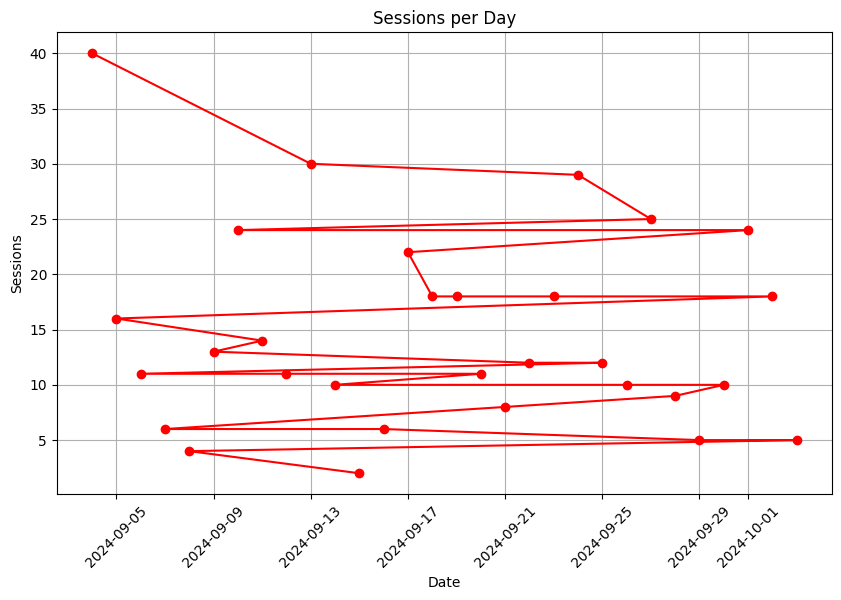

In [34]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df['Date'], df['Sessions'], marker='o', linestyle='-', color='red')

ax.set_xlabel('Date')
ax.set_ylabel('Sessions')
ax.set_title('Sessions per Day')

plt.grid(True)
plt.xticks(rotation=45)

plt.show()

In [36]:
%%ai ollama:llama3.2
The data seem to be all out of order date-wise. Could you sort the data and then plot it?

To fix the issue, we need to make sure that the dates are sorted correctly before plotting them.

Here's an example code snippet using Python with pandas and matplotlib libraries:

```python
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample data
data = {
    'Date': ['2022-01-20', '2021-02-10', '2023-03-15', '2022-04-25', '2021-05-18'],
    'Value': [100, 120, 110, 130, 105]
}

# Convert date to datetime format
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])

# Sort the data by Date in ascending order
df_sorted = df.sort_values(by='Date')

# Print sorted data
print("Sorted Data:")
print(df_sorted)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['Date'], df_sorted['Value'], marker='o')
plt.title('Line plot of Sorted Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()
```

This code will first sort the date in ascending order, then print and plot the sorted data.

Please replace your actual data into this code snippet and run it.

In [37]:
df_sorted = df.sort_values(by='Date')

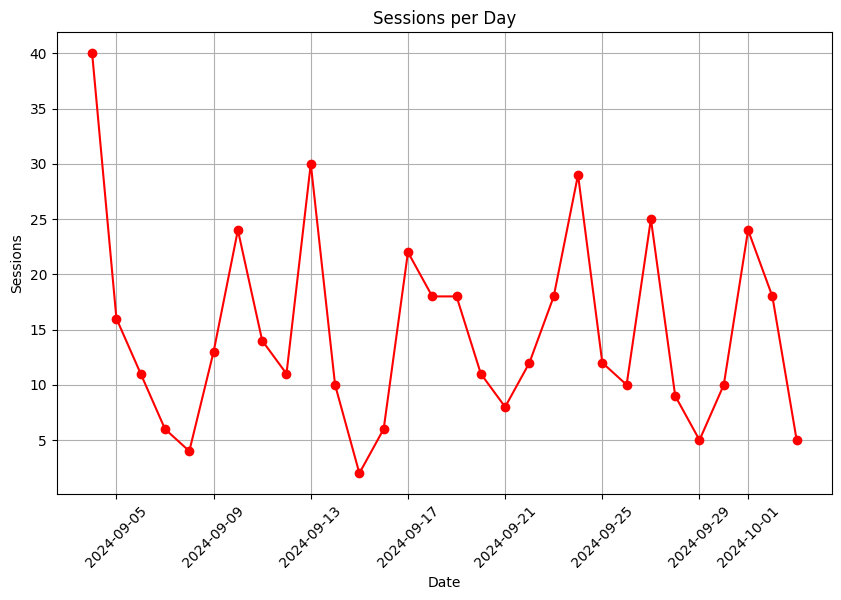

In [42]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df_sorted['Date'], df_sorted['Sessions'], marker='o', linestyle='-', color='red')

ax.set_xlabel('Date')
ax.set_ylabel('Sessions')
ax.set_title('Sessions per Day')

plt.grid(True)
plt.xticks(rotation=45)

plt.show()

In [45]:
%%ai ollama:llama3.2
Could you take the code below and add code to plot a dashed horizontal line of the average value, as well as solid black horizontal lines for +1 and -1 standard deviations away from the average?

```
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df_sorted['Date'], df_sorted['Sessions'], marker='o', linestyle='-', color='red')

ax.set_xlabel('Date')
ax.set_ylabel('Sessions')
ax.set_title('Sessions per Day')

plt.grid(True)
plt.xticks(rotation=45)

plt.show()
```

```markdown
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame
df_mean = df_sorted['Sessions'].mean()

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df_sorted['Date'], df_sorted['Sessions'], marker='o', linestyle='-', color='red')

ax.axhline(y=df_mean, color='black', linestyle='--', label='Average')
ax.axhline(y=df_mean + np.std(df_sorted['Sessions']), color='black', linestyle='-', label='+1 standard deviation')
ax.axhline(y=df_mean - np.std(df_sorted['Sessions']), color='black', linestyle='-', label='-1 standard deviation')

ax.set_xlabel('Date')
ax.set_ylabel('Sessions')
ax.set_title('Sessions per Day')

plt.grid(True)
plt.xticks(rotation=45)

plt.legend()
plt.show()
```

This code adds two additional horizontal lines to the plot using `axhline`. The first line is a dashed black line at the mean value. The second and third lines are solid black lines at +1 and -1 standard deviations, respectively.

Please note that you need to import numpy for the standard deviation calculation (`np.std`) and add labels and legend to make the plot more informative.

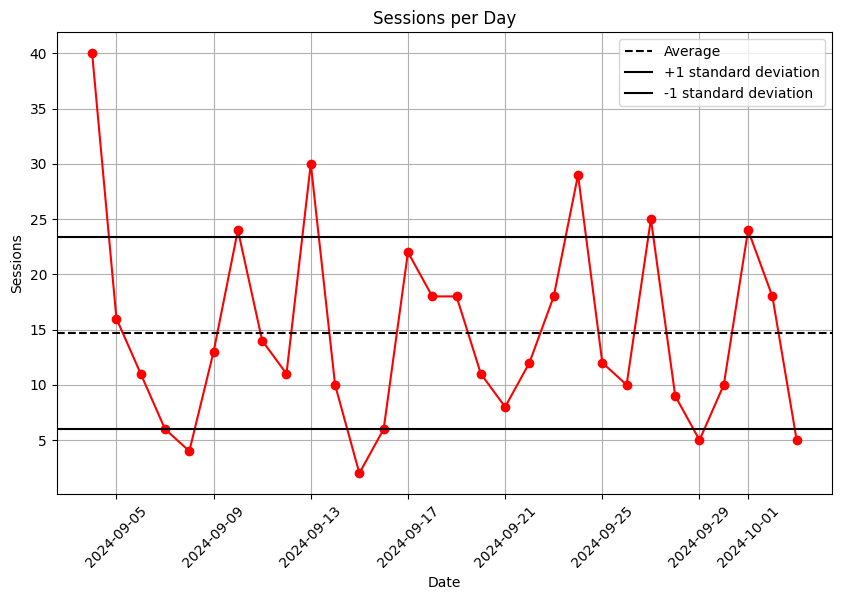

In [46]:
df_mean = df_sorted['Sessions'].mean()

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df_sorted['Date'], df_sorted['Sessions'], marker='o', linestyle='-', color='red')

ax.axhline(y=df_mean, color='black', linestyle='--', label='Average')
ax.axhline(y=df_mean + np.std(df_sorted['Sessions']), color='black', linestyle='-', label='+1 standard deviation')
ax.axhline(y=df_mean - np.std(df_sorted['Sessions']), color='black', linestyle='-', label='-1 standard deviation')

ax.set_xlabel('Date')
ax.set_ylabel('Sessions')
ax.set_title('Sessions per Day')

plt.grid(True)
plt.xticks(rotation=45)

plt.legend()
plt.show()

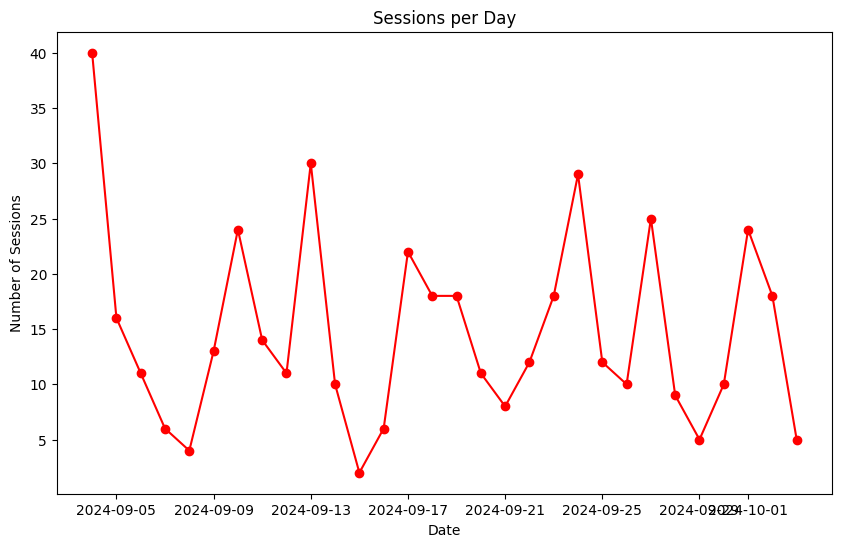

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = df.sort_values(by='Date')

# Plotting the data
plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['Sessions'], marker='o', color='red')
plt.title('Sessions per Day')
plt.xlabel('Date')
plt.ylabel('Number of Sessions')

# Showing the plot
plt.show()

### Using RAG with `/learn` and chatting with documents

Jupyter AI has the ability to [read documents in a directory](https://jupyter-ai.readthedocs.io/en/latest/users/index.html#learning-about-local-data) and allow Q&A through Jupyternaut. \

Here we have a document on enhanced measurement events in GA4. We want to get an answer to a question and can use AI in Jupyter to help us! In Jupyternaut, we just pass the name of the directory using the command: `/learn <directory>`. We can then ask questions using the data as context with `/ask`.

Currently, the following formats are supported:
- Python files and Jupyter notebooks (`.py`, `.ipynb`)
- Markdown (`.md`)
- R files (`.R`, `.Rmd`)
- Webpages and documents (`.txt`, `.html`, `.pdf`)
- Various others (`.jl`, `.sh`,  `.tex`)

### Conclusion
That concludes the notebook. For further resources, check out the official Jupyter AI and Ollama resoures below:
- [Jupyter AI Documentation](https://jupyter-ai.readthedocs.io/en/latest/)
- [Jupyter AI on Github](https://github.com/jupyterlab/jupyter-ai)
- [Generative AI in Jupyter](https://blog.jupyter.org/generative-ai-in-jupyter-3f7174824862): Announcement post from Jupyter team
- [Ollama Official Site](https://ollama.com/)
- [Ollama Models Directory](https://ollama.com/library)
- [Official Documentation on Github](https://github.com/ollama/ollama/blob/main/docs/README.md)

----
<table>
<tr>
    <th align="left" width="50%">Copyright NLP from scratch, 2024.</th>
    <th align="right" width="25%"><a href="https://www.nlpfromscratch.com?utm_source=notebook&utm_medium=nb-footer-img"><img src="assets/NLPFS_banner.png" width="100%"></th>
</tr>
</table>
 
</tr>
</table>